# Run Filter

In [ ]:
%load_ext autoreload
%autoreload 2

from filters.filters.filter_api import FilterAPI

config = {
    
}

# Inspect

## Raw

In [16]:
import pandas as pd
import os
import numpy as np
from utils.utils import get_dataframe_summary

%load_ext autoreload
%autoreload 2

#p = os.path.join(os.environ['PKG_PATH'], 'dataset', 'raw', 'dataset.pkl')
p = os.path.join("/home/xli4217/Dropbox/postdoc/Research/TRI/project_src/vehicle_behavior_filter", 'dataset', 'raw', 'raw_dataset.pkl')

d = pd.read_pickle(p)

d_info = get_dataframe_summary(d)
print(d_info)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
data shape: (2085, 30)
+------------------------+-------------------------+---------------+---------------------+---------------------+--------------------+
|      Column name       |           type          |     shape     |         min         |         mean        |        max         |
+------------------------+-------------------------+---------------+---------------------+---------------------+--------------------+
|      scene_token       |      <class 'str'>      |      n/a      |         n/a         |         n/a         |        m/a         |
|   scene_description    |      <class 'str'>      |      n/a      |         n/a         |         n/a         |        m/a         |
|       scene_name       |      <class 'str'>      |      n/a      |         n/a         |         n/a         |        m/a         |
|   scene_nbr_samples    |  <class 'numpy.int64'>  |      n/a      |         n/a     

## Filtered

In [11]:
import pandas as pd
import os
import numpy as np
from utils.utils import get_dataframe_summary

%load_ext autoreload
%autoreload 2

#p = os.path.join(os.environ['PKG_PATH'], 'dataset', 'raw', 'dataset.pkl')
p = os.path.join("/home/xli4217/Dropbox/postdoc/Research/TRI/project_src/vehicle_behavior_filter", 'dataset', 'filtered', 'data.pkl')

d = pd.read_pickle(p)

d_info = get_dataframe_summary(d)
print(d_info)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
data shape: (2085, 32)
+------------------------+-------------------------+---------------+---------------------+---------------------+--------------------+
|      Column name       |           type          |     shape     |         min         |         mean        |        max         |
+------------------------+-------------------------+---------------+---------------------+---------------------+--------------------+
|      scene_token       |      <class 'str'>      |      n/a      |         n/a         |         n/a         |        m/a         |
|   scene_description    |      <class 'str'>      |      n/a      |         n/a         |         n/a         |        m/a         |
|       scene_name       |      <class 'str'>      |      n/a      |         n/a         |         n/a         |        m/a         |
|   scene_nbr_samples    |  <class 'numpy.int64'>  |      n/a      |         n/a     

In [21]:
from paths import mini_path
from nuscenes.nuscenes import NuScenes
from nuscenes.map_expansion.map_api import NuScenesMap

di = d.iloc[0]

nusc = NuScenes(version='v1.0-mini', dataroot=mini_path, verbose=True)

sample = nusc.get('sample', di.sample_token)
scene = nusc.get('scene', sample['scene_token'])
scene_log = nusc.get('log', scene['log_token'])
nusc_map = NuScenesMap(dataroot=mini_path, map_name=scene_log['location'])

p = nusc_map.get('road_segment', di.ego_road_objects['road_segment'])
print(p['is_intersection'])

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.4 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
True


## Facet

In [ ]:
from utils.utils import facet_display_overview, facet_display_stat
import pandas as pd

%load_ext autoreload
%autoreload 2

def create_df_facet(d):
    return d.drop([
        'sample_token',
        'sample_idx',
        'sample_time',
        'ego_observations',
        'ado_obs', 
        'discretized_lane',
        'ego_future',
        'ego_past',
        'ado_obs',
        'ado_futures',
        'ado_past',
        'instance_tokens',
        'ego_vel',
        'ado_vel'
    ], axis=1)


d_facet = create_df_facet(d)
facet_display_stat(d_facet)
#facet_display_overview(d)

## Scene Visualization

In [19]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
from pathlib import Path
from utils.utils import get_dataframe_summary
from nuscenes_env.graphics.scene_graphics import SceneGraphics
from configs.configs import na_config

scene_graphics = SceneGraphics(config={'NuScenesAgent_config':na_config})

p = os.path.join(os.environ['PKG_PATH'], 'dataset', 'filtered', 'data.pkl')

d = pd.read_pickle(p)
print(f"data shape: {d.shape}")
print(get_dataframe_summary(d))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.2 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
data shape: (2085, 32)
data shape: (2085, 32)
+------------------------+-------------------------+---------------+---------------------+---------------------+--------------------+
|      Column name       |           type          |     shape     |         min         |         mean        |        max         |
+------------------------+-------------------------+---------------+---------------------+---------------------+--------------------+
|      scene_token       |      <class 'str'>      |      n/a      |         n/a         |         n/a         |        m/a         |
|   scene

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


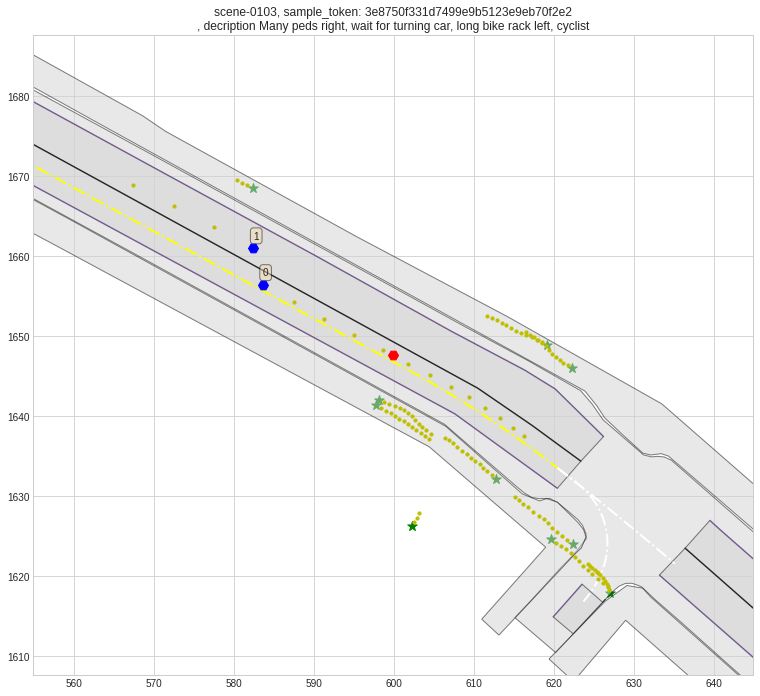

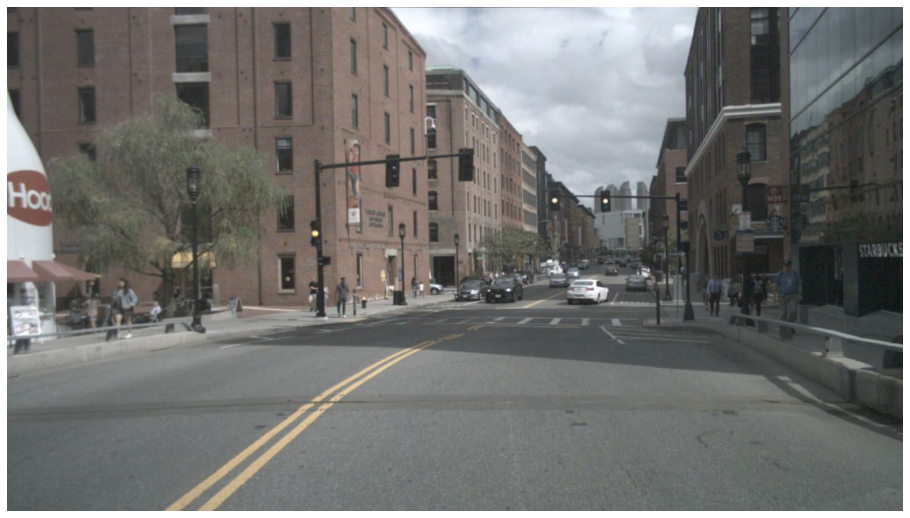

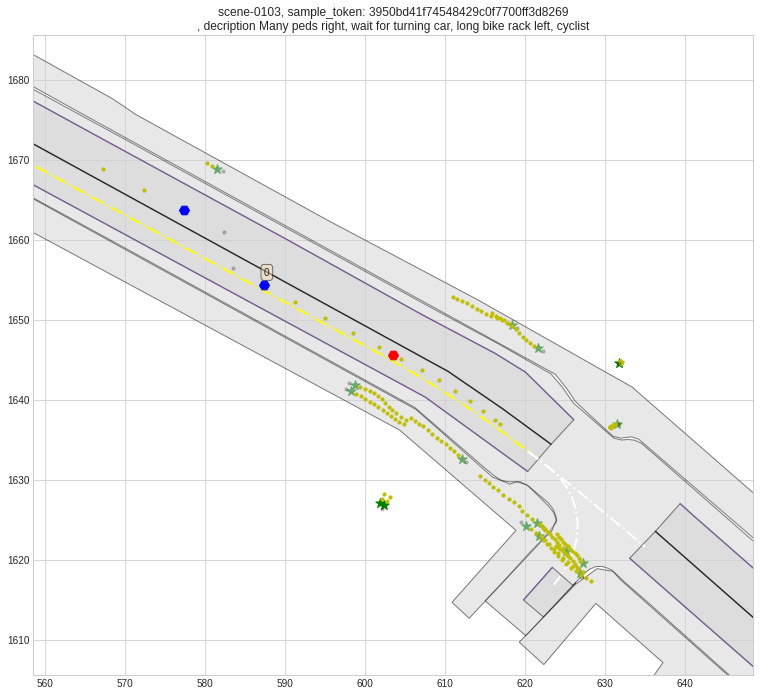

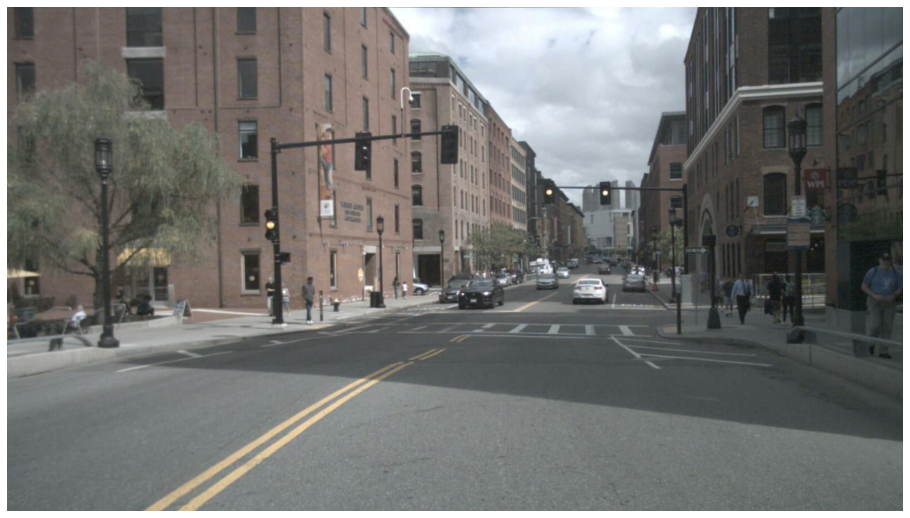

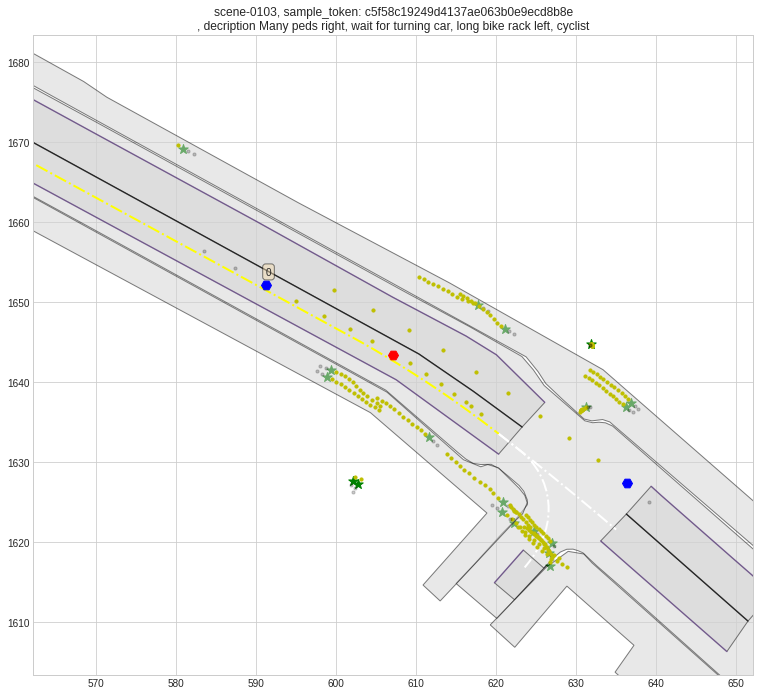

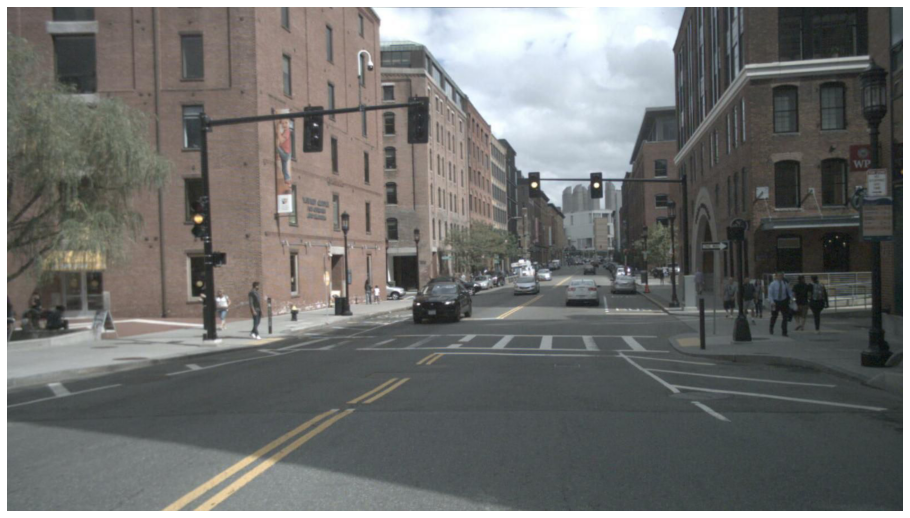

In [53]:
%load_ext autoreload
%autoreload 2

from filters.utils import visualize_scene, visualize_sample

visualize_scene(d, scene_name='scene-0103', sample_idx=None, scene_graphics=scene_graphics, nbr_samples=3)